In [134]:
# PDE: -u_xx - u_yy = f(x, y)  on  [0,1]^2
# BCs:
#   u(x, 0) = 0
#   n·∇u = 0  at x=0 and x=1   (Neumann)
#   u(x, 1) = cos(π x)

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as sla

In [ ]:
def u_exact(x,y):
    return (np.sinh(np.pi*y)/np.sinh(np.pi)) * np.cos(np.pi*x)

In [136]:
def laplace_finite_difference(nx, ny):

    # Create cell-centered grid
    x1d, hx = np.linspace(0, 1, nx, endpoint=False, retstep=True)
    y1d, hy = np.linspace(0, 1, ny, endpoint=False, retstep=True)
    x1d += hx / 2
    y1d += hy / 2

    # Create 2D meshgrid
    x, y = np.meshgrid(x1d, y1d)

    # Compute and print mesh statistics
    total_points = x.size
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    print("Mesh Statistics:")
    print(f"  Total points: {total_points}")
    print(f"  x range: {x_min:.3f} to {x_max:.3f} (spacing hx={hx:.5f})")
    print(f"  y range: {y_min:.3f} to {y_max:.3f} (spacing hy={hy:.5f})")

    N = ny * nx

    alpha = 1 / hx**2
    beta  = 1 / hy**2

    def f_func(x, y):
        return 0.0

    A = sp.lil_matrix((N, N))
    b = np.zeros(N)

    # Fill matrix A and vector b
    for i in range(ny):
        for j in range(nx):
            k = i * nx + j
            b[k] = f_func(x1d[j], y1d[i])

            # --- x-direction discretization (Neumann BC at x=0 and x=nx-1) ---
            # if j == 0:
            #     # A[k, k]     += 2 * alpha
            #     # A[k, k + 1] += -2 * alpha
            # elif j == nx - 1:
            #     # A[k, k]     += 2 * alpha
            #     # A[k, k - 1] += -2 * alpha
            # else:
            if j != 0 and j != nx - 1:
                A[k, k - 1] += -alpha
                A[k, k]     += 2 * alpha
                A[k, k + 1] += -alpha

            #  --- y-direction discretization ---
            if i != 0 and i != ny - 1:
                A[k, k-nx] += -beta
                A[k, k]     += 2 * beta
                A[k, k+nx] += -beta

    # Apply Dirichlet boundary conditions in the y-direction after the loop, vectorized
    bottom = np.arange(nx)                        # i = 0 boundary indices
    top = np.arange((ny - 1) * nx, ny * nx)         # i = ny-1 boundary indices

    # Bottom boundary: u(x, 0) = 0
    A[bottom, :] = 0
    A[bottom, bottom] = 1.0
    b[bottom] = 0.0

    # Top boundary: u(x, 1) = sin(pi*x)
    A[top, :] = 0
    A[top, top] = 1.0
    b[top] = np.sin(np.pi * x1d)

    # Apply Dirichlet boundary conditions in the x-direction after the loop, vectorized
    left = np.arange(0, N, nx)                    # j = 0 boundary indices
    right = np.arange(nx - 1, N, nx)              # j = nx-1 boundary indices

    # Left boundary: u(0, y) = 0
    A[left, :] = 0
    A[left, left] = 1.0
    b[left] = 0.0

    # Right boundary: u(1, y) = 0
    A[right, :] = 0
    A[right, right] = 1.0
    b[right] = 0.0

    # # Set print options for larger matrices
    # np.set_printoptions(threshold=np.inf, linewidth=200, suppress=True, precision=1)
    #
    # # Print the matrix in full NumPy format
    # print(A.toarray())

    u_vec = sla.spsolve(A.tocsr(), b)
    u = u_vec.reshape((ny, nx))

    fig, ax = plt.subplots(figsize=(6, 5))
    c = ax.pcolormesh(x, y, u, shading='auto', cmap='plasma')
    ax.set_aspect('equal')
    ax.set_axis_off()
    cb = fig.colorbar(c, ax=ax)
    cb.set_label("u")
    plt.show()


Mesh Statistics:
  Total points: 14400
  x range: 0.004 to 0.996 (spacing hx=0.00833)
  y range: 0.004 to 0.996 (spacing hy=0.00833)


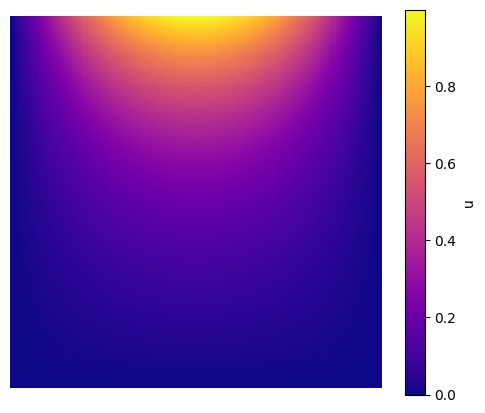

In [137]:
laplace_finite_difference(nx = 120, ny = 120)